In [1]:
from DataSplit import DataSplit

In [2]:
dataset_dir = "Crop-dataset"

In [3]:
data = DataSplit(datasetDir=dataset_dir)
data.get_combined_data()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,label,year
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,1,2021
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,1,2021
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,1,2021
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,1,2021
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,0.331873,0.637595,0.860933,0.936457,0.771076,0.402954,0.884208,0.515337,0.851545,0.908714,0.895963,0.858908,0,2023
915,0.333794,0.621409,0.841538,0.909154,0.736736,0.384046,0.886665,0.485586,0.846778,0.907973,0.904183,0.876847,0,2023
916,0.373900,0.618582,0.856424,0.903326,0.781238,0.375578,0.889700,0.532434,0.844510,0.911383,0.905652,0.899614,0,2023
917,0.349008,0.556529,0.855942,0.925486,0.800000,0.347044,0.895157,0.473819,0.812193,0.904762,0.899269,0.903632,0,2023


In [4]:
data.combined_data

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,label,year
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,1,2021
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,1,2021
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,1,2021
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,1,2021
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,0.331873,0.637595,0.860933,0.936457,0.771076,0.402954,0.884208,0.515337,0.851545,0.908714,0.895963,0.858908,0,2023
915,0.333794,0.621409,0.841538,0.909154,0.736736,0.384046,0.886665,0.485586,0.846778,0.907973,0.904183,0.876847,0,2023
916,0.373900,0.618582,0.856424,0.903326,0.781238,0.375578,0.889700,0.532434,0.844510,0.911383,0.905652,0.899614,0,2023
917,0.349008,0.556529,0.855942,0.925486,0.800000,0.347044,0.895157,0.473819,0.812193,0.904762,0.899269,0.903632,0,2023


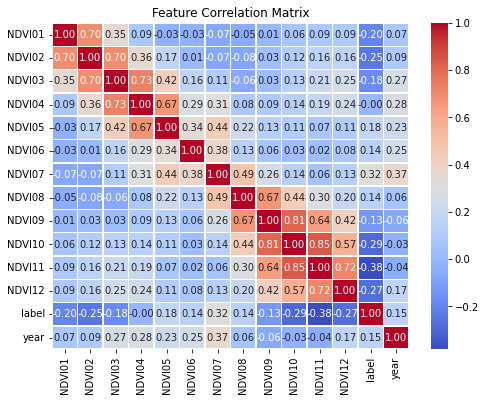

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate correlation matrix
correlation_matrix = data.combined_data.corr()

# Step 2: Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [6]:
data.combined_data = data.combined_data.drop(columns=['NDVI10'])

# Calling Preprocessing

In [7]:
from Data_Processing import DataPreProcess
dp=DataPreProcess()

The null in dataset are:
 NDVI01    0
NDVI02    0
NDVI03    0
NDVI04    0
NDVI05    0
NDVI06    0
NDVI07    0
NDVI08    0
NDVI09    0
NDVI10    0
NDVI11    0
NDVI12    0
label     0
year      0
dtype: int64
As there is no Null in Dataset so no removal us needed

Now we will check for the correlation in dataset



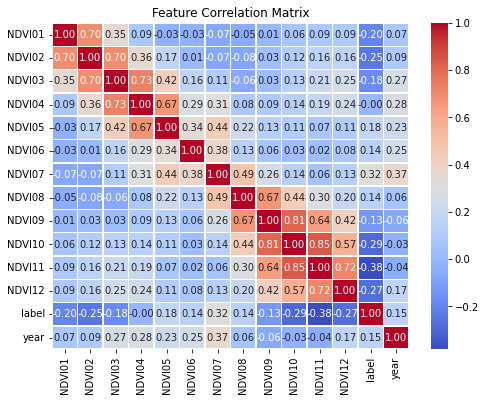

As NDVI10 is highly correlated with NDVI11 and NDVI09
So we will drop it

     NDVI01    NDVI02    NDVI03    NDVI04    NDVI05    NDVI06    NDVI07  \
0  0.153184  0.222615  0.498528  0.611280  0.285032  0.112775  0.529626   
1  0.137897  0.106036  0.169626  0.330396  0.594655  0.227967  0.578199   
2  0.122481  0.088123  0.182121  0.376037  0.431042  0.350422  0.630027   
3  0.085279  0.091887  0.140729  0.243528  0.224835  0.046875  0.579180   
4  0.091678  0.094313  0.247900  0.367800  0.546883  0.476697  0.699308   

     NDVI08    NDVI09    NDVI11    NDVI12  label  year  
0  0.546617  0.604374  0.620985  0.496628      1  2021  
1  0.661604  0.783454  0.729177  0.636792      1  2021  
2  0.724557  0.844643  0.736385  0.635118      1  2021  
3  0.666857  0.611009  0.612167  0.208681      1  2021  
4  0.768818  0.753445  0.707040  0.647931      1  2021  
Splitting the data:

Training Dataset of year 2022 and 2023:
Cotton samples: 24188
Rice samples: 5606
Testing Dataset of year 2021:
C

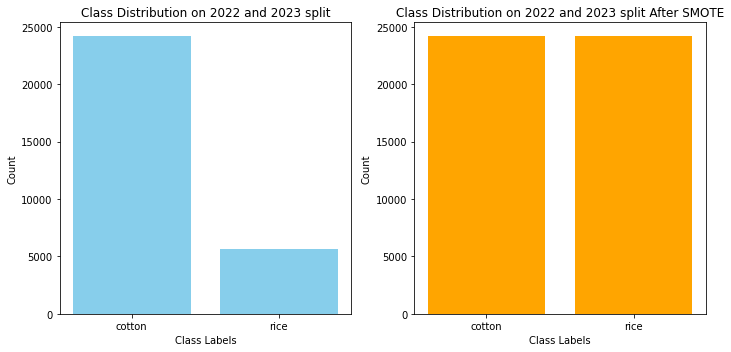

Original class distribution: Counter({1: 24188, 0: 5606})
New class distribution after SMOTE: Counter({1: 24188, 0: 24188})
Total samples after augmentation: 48376


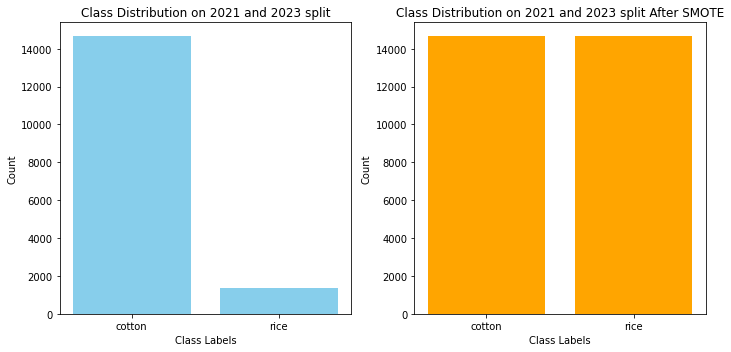

Original class distribution: Counter({1: 14660, 0: 1338})
New class distribution after SMOTE: Counter({1: 14660, 0: 14660})
Total samples after augmentation: 29320


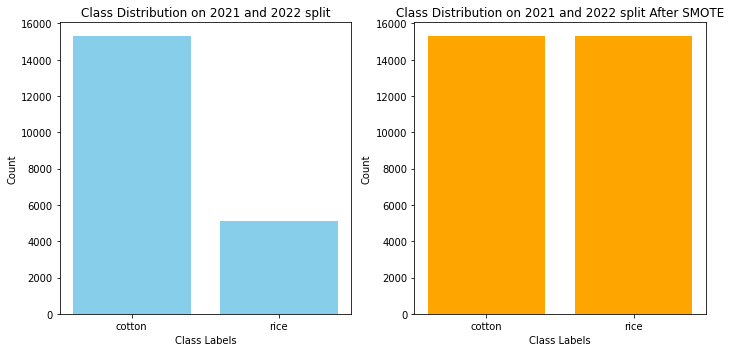

Original class distribution: Counter({1: 15294, 0: 5106})
New class distribution after SMOTE: Counter({1: 15294, 0: 15294})
Total samples after augmentation: 30588


In [8]:
data=dp.apply_preprocessing()

In [ ]:
from supervisedModels.RandomForrest import RandomForrest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
    'max_features': ['log2'],
    'criterion': ['gini']
}
#     param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'criterion': ['gini', 'entropy']
# }


RF = RandomForrest(data=data, param_grid=param_grid)
RF.get_best_hyperparameters()



Results on testing set 2021
params: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}

weighted_f1: 0.8484626953714334

accuracy: 0.8340399757722592

precision: 0.9400678477195628

recall: 0.865071106486299

f1: 0.9010115606936416

confusion_matrix: [[ 260  159]
 [ 389 2494]]

classification_report:               precision    recall  f1-score   support

        rice       0.40      0.62      0.49       419
      cotton       0.94      0.87      0.90      2883

    accuracy                           0.83      3302
   macro avg       0.67      0.74      0.69      3302
weighted avg       0.87      0.83      0.85      3302




Results on testing set 2022
params: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}

weighted_f1: 0.8747380058793053

accuracy: 0.8819744999415137

precision: 0.8761491132826638

recall: 0.975263878817

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 500}



individual scroe:                                               params  weighted_f1  accuracy  \
0  {'criterion': 'gini', 'max_depth': 20, 'max_fe...     0.848463  0.834040   
1  {'criterion': 'gini', 'max_depth': 20, 'max_fe...     0.874738  0.881974   
2  {'criterion': 'gini', 'max_depth': 20, 'max_fe...     0.880959  0.851843   

   precision    recall        f1              confusion_matrix  \
0   0.940068  0.865071  0.901012     [[260, 159], [389, 2494]]   
1   0.876149  0.975264  0.923053  [[2976, 1711], [307, 12104]]   
2   0.986433  0.852000  0.914301   [[781, 138], [1743, 10034]]   

                               classification_report  \
0                precision    recall  f1-score   ...   
1                precision    recall  f1-score   ...   
2                precision    recall  f1-score   ...   

                                          params_str  
0  {'criterion': 'gini', 'max_depth': 20, 'max_fe...  
1  {'criterion': 'gini', 'max_depth': 20, 'max_fe...  
2  {'cri

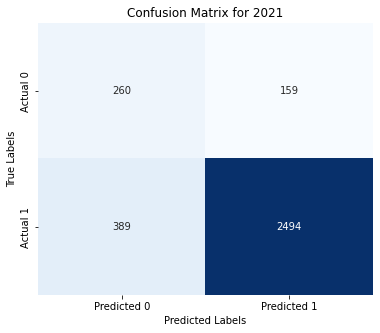

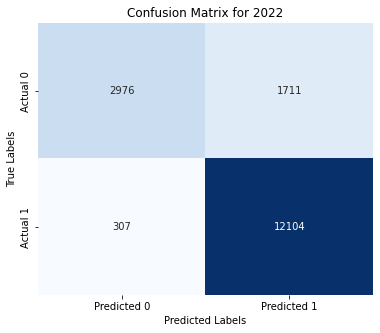

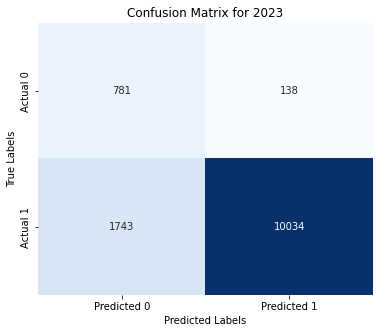

In [10]:
RF.get_test_results()

In [11]:
from supervisedModels.Bagging import Bagging
param_grid = {
    "n_estimators": [10, 50],  # Number of base estimators
    "max_samples": [0.5],    # Fraction of samples used to train each base estimator
    "max_features": [0.5],   # Fraction of features used in each base estimator
}
# param_grid = {
#     "n_estimators": [10, 50, 100, 200],  # Number of base estimators
#     "max_samples": [0.5, 0.75, 1.0],    # Fraction of samples used to train each base estimator
#     "max_features": [0.5, 0.75, 1.0],   # Fraction of features used in each base estimator
#     "bootstrap": [True, False],         # Whether to use sampling with replacement
#     "bootstrap_features": [True, False],  # Whether features are sampled with replacement
#     "base_estimator": [None],           # Defaults to decision tree; can also try other estimators
#     "random_state": [42]                # Fixed random seed for reproducibility
# }

bagging = Bagging(data=data, param_grid=param_grid)
bagging.get_best_hyperparameters()



Results on testing set 2021
params: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}

weighted_f1: 0.8647650790461606

accuracy: 0.8558449424591157

precision: 0.940036563071298

recall: 0.8917793964620188

f1: 0.9152723389106444

confusion_matrix: [[ 255  164]
 [ 312 2571]]

classification_report:               precision    recall  f1-score   support

        rice       0.45      0.61      0.52       419
      cotton       0.94      0.89      0.92      2883

    accuracy                           0.86      3302
   macro avg       0.69      0.75      0.72      3302
weighted avg       0.88      0.86      0.86      3302


params: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}

weighted_f1: 0.8751613386924794

accuracy: 0.8697758933979406

precision: 0.9394482264421354

recall: 0.9094693028095734

f1: 0.9242157208318647

confusion_matrix: [[ 250  169]
 [ 261 2622]]

classification_report:               precision    recall  f1-score   support

        rice    

{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}

In [12]:
bagging.get_test_results()



individual scroe:                                               params  weighted_f1  accuracy  \
1  {'max_features': 0.5, 'max_samples': 0.5, 'n_e...     0.875161  0.869776   
3  {'max_features': 0.5, 'max_samples': 0.5, 'n_e...     0.866061  0.875892   
5  {'max_features': 0.5, 'max_samples': 0.5, 'n_e...     0.885152  0.858144   

   precision    recall        f1              confusion_matrix  \
1   0.939448  0.909469  0.924216     [[250, 169], [261, 2622]]   
3   0.864367  0.983321  0.920015  [[2772, 1915], [207, 12204]]   
5   0.985120  0.860066  0.918355   [[766, 153], [1648, 10129]]   

                               classification_report  \
1                precision    recall  f1-score   ...   
3                precision    recall  f1-score   ...   
5                precision    recall  f1-score   ...   

                                          params_str  
1  {'max_features': 0.5, 'max_samples': 0.5, 'n_e...  
3  {'max_features': 0.5, 'max_samples': 0.5, 'n_e...  
5  {'max

KeyError: 0

In [12]:
from supervisedModels.SVM import SVM
param_grid = {
    'C': [0.01, 1],
    'kernel': ['linear'],
    'degree': [3],
    'gamma': [1],
    'coef0': [2],
    'tol': [1e-5],
    'max_iter': [2000]
}
#     param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': [3, 4, 5],
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
#     'coef0': [0, 0.5, 1, 2],
#     'tol': [1e-3, 1e-4, 1e-5],
#     'max_iter': [-1, 1000, 2000]
# }

svm = SVM(data=data, param_grid=param_grid)
svm.get_best_hyperparameters()



Results on testing set 2021
params: {'C': 20}

weighted_f1: 0.8599496760128335

accuracy: 0.8449424591156874

precision: 0.9533460803059274

recall: 0.8647242455775234

f1: 0.9068752273554019

confusion_matrix: [[ 297  122]
 [ 390 2493]]

classification_report:               precision    recall  f1-score   support

        rice       0.43      0.71      0.54       419
      cotton       0.95      0.86      0.91      2883

    accuracy                           0.84      3302
   macro avg       0.69      0.79      0.72      3302
weighted avg       0.89      0.84      0.86      3302




Results on testing set 2022
params: {'C': 20}

weighted_f1: 0.8077284892798409

accuracy: 0.8128436074394666

precision: 0.8508417764912013

recall: 0.8999274836838289

f1: 0.8746965306601927

confusion_matrix: [[ 2729  1958]
 [ 1242 11169]]

classification_report:               precision    recall  f1-score   support

        rice       0.69      0.58      0.63      4687
      cotton       0.85      0.

{'C': 20}

Final Results for year: 2021:
Parameters: {'C': 20}
Weighted F1: 0.8599
Accuracy: 0.8449
Precision: 0.9533
Recall: 0.8647
F1 Score: 0.9069
Confusion Matrix: [[ 297  122]
 [ 390 2493]]
Classification Report:               precision    recall  f1-score   support

        rice       0.43      0.71      0.54       419
      cotton       0.95      0.86      0.91      2883

    accuracy                           0.84      3302
   macro avg       0.69      0.79      0.72      3302
weighted avg       0.89      0.84      0.86      3302


Final Results for year: 2022:
Parameters: {'C': 20}
Weighted F1: 0.8077
Accuracy: 0.8128
Precision: 0.8508
Recall: 0.8999
F1 Score: 0.8747
Confusion Matrix: [[ 2729  1958]
 [ 1242 11169]]
Classification Report:               precision    recall  f1-score   support

        rice       0.69      0.58      0.63      4687
      cotton       0.85      0.90      0.87     12411

    accuracy                           0.81     17098
   macro avg       0.77      0.74   

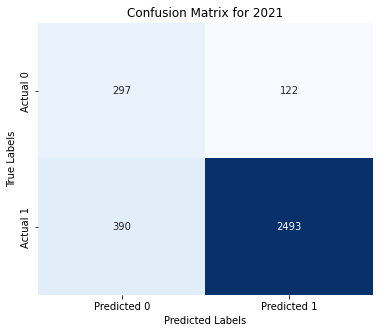

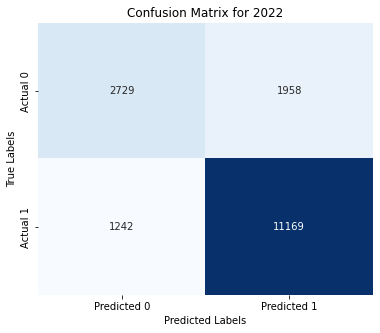

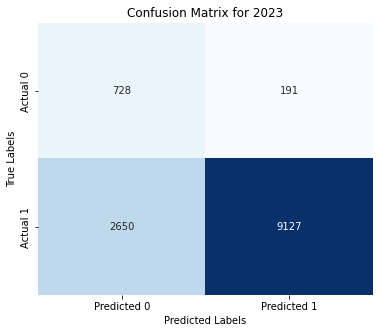

In [13]:
svm.get_test_results()

In [14]:
from supervisedModels.XGBoost import XGBoost
param_grid = {
    'n_estimators': [200, 500],
    'learning_rate': [0.2],
    'max_depth': [10],
    'min_child_weight': [10],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'colsample_bylevel': [1.0],
    'gamma': [1],
    'scale_pos_weight': [10],
    'reg_alpha': [1],
    'reg_lambda': [1],
}
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 6, 10],
#     'min_child_weight': [1, 3, 5, 10],
#     'subsample': [0.6, 0.7, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'colsample_bylevel': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.5, 1],
#     'scale_pos_weight': [1, 2, 5, 10],
#     'reg_alpha': [0, 0.01, 0.1, 1],
#     'reg_lambda': [0, 0.01, 0.1, 1],
#     'objective': ['binary:logistic', 'multi:softmax'],
#     'booster': ['gbtree', 'dart'],
#     'tree_method': ['auto', 'hist', 'gpu_hist']
# }
xg = XGBoost(data=data, param_grid=param_grid)
xg.get_best_hyperparameters()



Results on testing set 2021
params: {'max_depth': 20}

weighted_f1: 0.8584952729348255

accuracy: 0.8467595396729255

precision: 0.9419858683525474

recall: 0.8785986819285466

f1: 0.9091888011486001

confusion_matrix: [[ 263  156]
 [ 350 2533]]

classification_report:               precision    recall  f1-score   support

        rice       0.43      0.63      0.51       419
      cotton       0.94      0.88      0.91      2883

    accuracy                           0.85      3302
   macro avg       0.69      0.75      0.71      3302
weighted avg       0.88      0.85      0.86      3302




Results on testing set 2022
params: {'max_depth': 20}

weighted_f1: 0.8446467803582621

accuracy: 0.8571177915545678

precision: 0.8498525902007581

recall: 0.9755055998710821

f1: 0.9083542784259294

confusion_matrix: [[ 2548  2139]
 [  304 12107]]

classification_report:               precision    recall  f1-score   support

        rice       0.89      0.54      0.68      4687
      cotton   

{'max_depth': 20}

Final Results for year: 2021:
Parameters: {'max_depth': 20}
Weighted F1: 0.8585
Accuracy: 0.8468
Precision: 0.9420
Recall: 0.8786
F1 Score: 0.9092
Confusion Matrix: [[ 263  156]
 [ 350 2533]]
Classification Report:               precision    recall  f1-score   support

        rice       0.43      0.63      0.51       419
      cotton       0.94      0.88      0.91      2883

    accuracy                           0.85      3302
   macro avg       0.69      0.75      0.71      3302
weighted avg       0.88      0.85      0.86      3302


Final Results for year: 2022:
Parameters: {'max_depth': 20}
Weighted F1: 0.8446
Accuracy: 0.8571
Precision: 0.8499
Recall: 0.9755
F1 Score: 0.9084
Confusion Matrix: [[ 2548  2139]
 [  304 12107]]
Classification Report:               precision    recall  f1-score   support

        rice       0.89      0.54      0.68      4687
      cotton       0.85      0.98      0.91     12411

    accuracy                           0.86     17098
   macro avg       0

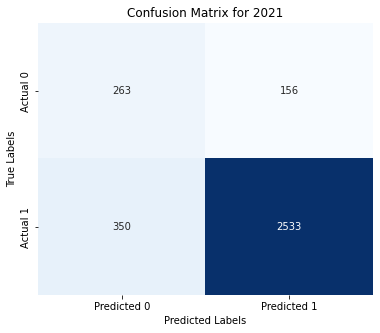

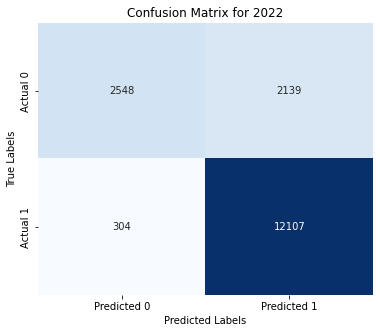

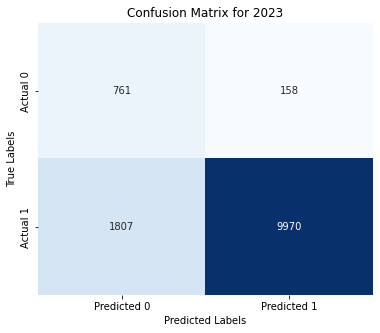

In [ ]:
xg.get_test_results()